<a href="https://colab.research.google.com/github/Sescallupe/RadarChallenge2022/blob/main/Def_Radar_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the packages and open the drive  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 #Open CV Python
import numpy as np
import os
import gc
import matplotlib.pyplot as plt
from glob import glob
from scipy.io import loadmat
import random

In [ ]:
from keras.utils import np_utils
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

#Create training, test, validation data

In [ ]:
#!wget https://www.seanoe.org/data/00456/56796/data/58684.tar.gz #download data .tar

In [ ]:
#!tar -xzvf '/content/drive/MyDrive/Radar_Challenge/Imagenes.tar' '/content/drive/MyDrive/Radar_Challenge' #Extract Data

In [ ]:
#Augmented train data
aumento_train = glob("/content/drive/MyDrive/Radar_Challenge/Imagenes_Usadas2/Aumento_data_train" + "/*.jpg") 

In [ ]:
aumento_train[1].split("_")[5]

'M'

In [ ]:
len(aumento_train)

4620

In [ ]:
imge = cv2.imread(aumento_train[2])

In [ ]:
imge.shape

(350, 350, 3)

In [ ]:
label_atrain=[]
for i in aumento_train:
  l=i.split("_")[5]
  label_atrain.append(l)


In [ ]:
label_atrain=np.array(label_atrain) #Augmented data classes

In [ ]:
for e in np.unique( label_atrain):
    print('Number of {}: '.format(e), label_atrain[ label_atrain==e].size)

Number of F:  462
Number of G:  462
Number of H:  462
Number of I:  462
Number of J:  462
Number of K:  462
Number of L:  462
Number of M:  462
Number of N:  462
Number of O:  462


In [ ]:
#Cluster augmented train data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img, image, img_to_array
i=0
dataA_train=[]

for image_file in aumento_train:
    img_path = image_file
    imge = cv2.imread(img_path)
    dataA_train.append(imge)
    gc.collect()
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
# Prepare data
dataA_train=np.squeeze(np.array(dataA_train))

In [ ]:
dataA_train.shape

(4620, 300, 300, 3)

In [ ]:
 gc.collect()

167

In [ ]:
#Train data
train_true=glob("/content/drive/MyDrive/Radar_Challenge/Imagenes_Usadas2/Data_train" + "/*.jpg")

In [ ]:
train_true

['/content/drive/MyDrive/Radar_Challenge/Imagenes_Usadas2/Data_train/_L_s1a-wv1-slc-vv-20160611t061750-20160611t061753-011659-011d88-057.tiff.jpg',
 '/content/drive/MyDrive/Radar_Challenge/Imagenes_Usadas2/Data_train/_L_s1a-wv1-slc-vv-20160121t111546-20160121t111549-009591-00df56-003.tiff.jpg',
 '/content/drive/MyDrive/Radar_Challenge/Imagenes_Usadas2/Data_train/_L_s1a-wv2-slc-vv-20161231t135522-20161231t135525-014624-017c63-100.tiff.jpg',
 '/content/drive/MyDrive/Radar_Challenge/Imagenes_Usadas2/Data_train/_L_s1a-wv1-slc-vv-20160513t142602-20160513t142604-011241-011016-097.tiff.jpg',
 '/content/drive/MyDrive/Radar_Challenge/Imagenes_Usadas2/Data_train/_L_s1a-wv1-slc-vv-20160213t215137-20160213t215140-009933-00e948-031.tiff.jpg',
 '/content/drive/MyDrive/Radar_Challenge/Imagenes_Usadas2/Data_train/_L_s1a-wv2-slc-vv-20160302t211502-20160302t211505-010195-00f0ce-004.tiff.jpg',
 '/content/drive/MyDrive/Radar_Challenge/Imagenes_Usadas2/Data_train/_L_s1a-wv1-slc-vv-20160426t111547-20160426t

In [ ]:
len(train_true)

2310

In [ ]:
imge = cv2.imread(train_true[2680])

In [ ]:
imge.shape

(350, 350, 3)

In [ ]:
train_true[1].split("_")[4]

'K'

In [ ]:
label_train=[]
for i in train_true:
  l=i.split("_")[4]
  label_train.append(l)

In [ ]:
for e in np.unique( label_train):
    print('Number of {}: '.format(e), label_train[ label_train==e].size)

Number of F:  231
Number of G:  231
Number of H:  231
Number of I:  231
Number of J:  231
Number of K:  231
Number of L:  231
Number of M:  231
Number of N:  231
Number of O:  231


In [ ]:
label_train=np.array(label_train) #Train data classes

In [ ]:
#Cluster train data
i=0
data_train=[]
for image_file in train_true:
    img_path = image_file
    img = cv2.imread(img_path)
    data_train.append([img])
    gc.collect()
    i=i+1
    print(i)

In [ ]:
# Prepare data
data_train=np.squeeze(np.array(data_train))

In [ ]:
# Validation data
valid_true=glob("/content/drive/MyDrive/Radar_Challenge/Imagenes_Usadas2/Data_valid" + "/*.jpg")

In [ ]:
valid_true[1].split("_")[4]

'J'

In [ ]:
len(valid_true)

1540

In [ ]:
imge = cv2.imread(valid_true[2])

In [ ]:
imge.shape

(300, 300, 3)

In [ ]:
label_valid=[]
for i in valid_true:
  l=i.split("_")[4]
  label_valid.append(l)

In [ ]:
label_valid=np.array(label_valid) #Validation data classes

In [ ]:
for e in np.unique( label_valid):
    print('Number of {}: '.format(e), label_valid[ label_valid==e].size)

Number of F:  154
Number of G:  154
Number of H:  154
Number of I:  154
Number of J:  154
Number of K:  154
Number of L:  154
Number of M:  154
Number of N:  154
Number of O:  154


In [ ]:
#Cluster validation data
i=0
data_valid=[]
for image_file in valid_true:
    img_path = image_file
    img = cv2.imread(img_path)
    data_valid.append([img])
    gc.collect()
    i=i+1
    print(i)

In [ ]:
# Prepare data
data_valid=np.squeeze(np.array(data_valid))

In [ ]:
test_true=glob("/content/drive/MyDrive/Radar_Challenge/Imagenes_Usadas2/Data_test" + "/*.jpg")


In [ ]:
len(test_true)

1650

In [ ]:
test_true[1].split("_")[4]

'I'

In [ ]:
Label_test=[]
for i in test_true:
  l=i.split("_")[4]
  Label_test.append(l)

In [ ]:
for e in np.unique( Label_test):
    print('Number of {}: '.format(e), Label_test[ Label_test==e].size)

Number of F:  165
Number of G:  165
Number of H:  165
Number of I:  165
Number of J:  165
Number of K:  165
Number of L:  165
Number of M:  165
Number of N:  165
Number of O:  165


In [ ]:
Label_test=np.array(Label_test) #Validation data classes

In [ ]:
#Cluster validation data
i=0
Data_test=[]
for image_file in test_true:
    img_path = image_file
    img = cv2.imread(img_path)
    Data_test.append([img])
    gc.collect()
    i=i+1
    print(i)

In [ ]:
# Prepare data
Data_test=np.squeeze(np.array(Data_test))

#**Cluster Data**

In [ ]:
Data_train=np.concatenate([data_train,dataA_train])

In [ ]:
data_valid.shape

(1540, 300, 300, 3)

In [ ]:
data_train.shape

(2310, 300, 300, 3)

In [ ]:
dataA_train.shape

(4620, 300, 300, 3)

In [ ]:
gc.collect()

176

#**Cluster Label**

In [ ]:
#Cluster
Label_train=np.concatenate([label_train,label_atrain])
Label_valid=label_valid

In [ ]:
for e in np.unique( Label_valid):
    print('Number of {}: '.format(e), Label_valid[ Label_valid==e].size)

Number of F:  154
Number of G:  154
Number of H:  154
Number of I:  154
Number of J:  154
Number of K:  154
Number of L:  154
Number of M:  154
Number of N:  154
Number of O:  154


In [ ]:
Label_train.shape

(6930,)

In [ ]:
Label_valid=label_valid

In [ ]:
gc.collect()

176

In [ ]:
label_atrain

array(['M', 'M', 'M', ..., 'G', 'G', 'G'], dtype='<U1')

In [ ]:
Label_train[Label_train=='F']=0
Label_train[Label_train=='G']=1
Label_train[Label_train=='H']=2
Label_train[Label_train=='I']=3
Label_train[Label_train=='J']=4
Label_train[Label_train=='K']=5
Label_train[Label_train=='L']=6
Label_train[Label_train=='M']=7
Label_train[Label_train=='N']=8
Label_train[Label_train=='O']=9

In [ ]:
for e in np.unique( Label_train):
    print('Number of {}: '.format(e), Label_train[ Label_train==e].size)

Number of 0:  693
Number of 1:  693
Number of 2:  693
Number of 3:  693
Number of 4:  693
Number of 5:  693
Number of 6:  693
Number of 7:  693
Number of 8:  693
Number of 9:  693


In [ ]:
Label_train = Label_train.astype(np.int32)

In [ ]:
Label_train.shape

(6930,)

In [ ]:
Label_valid[Label_valid=='F']=0
Label_valid[Label_valid=='G']=1
Label_valid[Label_valid=='H']=2
Label_valid[Label_valid=='I']=3
Label_valid[Label_valid=='J']=4
Label_valid[Label_valid=='K']=5
Label_valid[Label_valid=='L']=6
Label_valid[Label_valid=='M']=7
Label_valid[Label_valid=='N']=8
Label_valid[Label_valid=='O']=9

In [ ]:
for e in np.unique( Label_test):
    print('Number of {}: '.format(e), Label_test[ Label_test==e].size)

Number of 0:  165
Number of 1:  165
Number of 2:  165
Number of 3:  165
Number of 4:  165
Number of 5:  165
Number of 6:  165
Number of 7:  165
Number of 8:  165
Number of 9:  165


In [ ]:
Label_valid = Label_valid.astype(np.int32)

In [ ]:
Label_test

array(['I', 'I', 'I', ..., 'I', 'I', 'I'], dtype='<U1')

In [ ]:
Label_test[Label_test=='F']=0
Label_test[Label_test=='G']=1
Label_test[Label_test=='H']=2
Label_test[Label_test=='I']=3
Label_test[Label_test=='J']=4
Label_test[Label_test=='K']=5
Label_test[Label_test=='L']=6
Label_test[Label_test=='M']=7
Label_test[Label_test=='N']=8
Label_test[Label_test=='O']=9

In [ ]:
Label_test = Label_test.astype(np.int32)

In [ ]:
gc.collect()

48167

In [ ]:
# Prepare Label
Label_train = np_utils.to_categorical(Label_train)
Label_valid = np_utils.to_categorical(Label_valid)


In [ ]:
Label_test = np_utils.to_categorical(Label_test)

In [ ]:
Label_train[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
Label_valid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#**Training**

In [ ]:
X_entrenamiento = Data_train
X_validacion = Data_valid

y_entrenamiento = Label_train
y_validacion = Label_valid

In [ ]:
import gc
gc.collect()

3850

##**Neural Network**

In [ ]:
img_size=300
nb_train_samples = len(Data_train)
nb_validation_samples = len(data_valid)
width_shape = img_size #declarado en la parte inicial
height_shape = img_size
num_classes = 10 #una sola salida
epochs = 40
batch_size = 64
image_input = Input(shape=(width_shape, height_shape, 3))

In [ ]:
#Red no secuencial con tres capas en paralelo
inputs = keras.Input(shape=(width_shape, height_shape, 3), name="img")
x = layers.Conv2D(64, (7,7), activation="relu")(inputs)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D((3,3))(x)

x = layers.Conv2D(128, 2, activation="relu", padding="same")(block_1_output)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(128, 3, activation="relu", padding="same")(block_2_output)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(192, (3,3), activation="relu")(block_3_output)
x = layers.MaxPooling2D(7)(x)

# las capas tower tienen que ser iguales
tower_1 = layers.Conv2D(256, (3,3), activation="relu", padding="same")(x)
tower_1 = layers.MaxPooling2D(3)(tower_1)

tower_2 = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
tower_2 = layers.MaxPooling2D(3)(tower_2)

tower_3 = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
tower_3 = layers.MaxPooling2D(3)(tower_3)

merged = keras.layers.concatenate([tower_1, tower_2, tower_3], axis=1)
merged = Flatten()(merged)

out = layers.Dense(512, activation='relu')(merged) #512
out = layers.Dropout(0.4)(out)#0.4
out = layers.Dense(128, activation='relu')(merged) #128
out = layers.Dropout(0.3)(out)#0.3
outputs = layers.Dense(10, activation='softmax')(out)

NSCNNMGeophysical = keras.Model(inputs, outputs, name = "CNNGeophysical")
NSCNNMGeophysical.summary()

# Definiendo hiperparámetros
NSCNNMGeophysical.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "CNNGeophysical"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_80 (Conv2D)             (None, 294, 294, 64  9472        ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 max_pooling2d_60 (MaxPooling2D  (None, 98, 98, 64)  0           ['conv2d_80[0][0]']              
 )                                                                                   

##**Fit**

In [ ]:
Data_train.shape

(6930, 300, 300, 3)

In [ ]:
Label_train.shape

(6930, 10)

In [ ]:
for e in np.unique( Label_train):
    print('Number of {}: '.format(e), Label_train[ Label_train==e].size)

Number of 0.0:  62370
Number of 1.0:  6930


In [ ]:
# Entrenando red neuronal
#tensorboardCNN_AD = TensorBoard(log_dir='logs/cnn_AD')

historial_CNNSimple = NSCNNMGeophysical.fit(
    #data_gen_entrenamiento,
    Data_train,  Label_train,
    epochs=epochs, batch_size=64,#64
    validation_data=(data_valid, Label_valid),
    steps_per_epoch=int(np.ceil(len(Data_train) /float(64))),
    validation_steps=int(np.ceil(len(data_valid) / float(64))),
    #callbacks=[callbacks]
)

Epoch 1/40
109/109 [==============================] - 16s 134ms/step - loss: 3.6576 - accuracy: 0.1577 - val_loss: 1.9703 - val_accuracy: 0.2299
Epoch 2/40
109/109 [==============================] - 14s 131ms/step - loss: 1.9604 - accuracy: 0.2595 - val_loss: 1.7302 - val_accuracy: 0.4052
Epoch 3/40
109/109 [==============================] - 14s 131ms/step - loss: 1.8143 - accuracy: 0.3316 - val_loss: 1.5331 - val_accuracy: 0.3864
Epoch 4/40
109/109 [==============================] - 14s 131ms/step - loss: 1.6116 - accuracy: 0.4063 - val_loss: 1.5136 - val_accuracy: 0.3942
Epoch 5/40
109/109 [==============================] - 14s 131ms/step - loss: 1.4687 - accuracy: 0.4638 - val_loss: 1.2250 - val_accuracy: 0.5760
Epoch 6/40
109/109 [==============================] - 14s 131ms/step - loss: 1.3695 - accuracy: 0.5058 - val_loss: 1.0767 - val_accuracy: 0.6208
Epoch 7/40
109/109 [==============================] - 14s 131ms/step - loss: 1.2762 - accuracy: 0.5446 - val_loss: 0.9703 - val_ac

In [ ]:
gc.collect()

5459

##**Results Obtained**

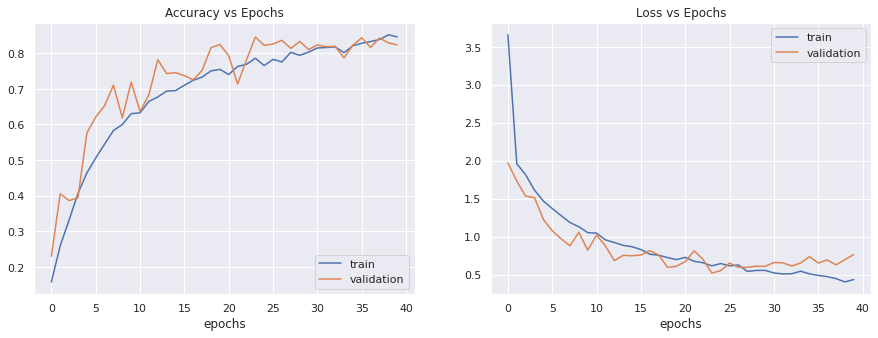

In [ ]:
#Graficas de precisión
acc = historial_CNNSimple.history['accuracy']
val_acc = historial_CNNSimple.history['val_accuracy']

loss = historial_CNNSimple.history['loss']
val_loss = historial_CNNSimple.history['val_loss']


rango_epocas = range(epochs)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='train')
plt.plot(rango_epocas, val_acc, label='validation')
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.title('Accuracy vs Epochs')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='train')
plt.plot(rango_epocas, val_loss, label='validation')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.title('Loss vs Epochs')
plt.show()

In [ ]:
predic = []
class_names=['POW','WS','MCC','RC','BS','SI','IB','LWA','AF','OF']
for i in range(len(Data_test)):
  #Extraemos imágen
  img = Data_test[i]
  img = (np.expand_dims(img,0))
  #Realizamos predicción
  predictions_single = np.squeeze(NSCNNMGeophysical.predict(img))
  max = np.max(predictions_single)
  cont = 0
  #hallamo posición de predicción
  for valor in predictions_single:
    if(max == valor):
      idx = cont
    cont=cont+1

  #predicción
  txt = class_names[idx]
  per = str(round(max*100))

  #Creando arreglo de predicciones
  predic.append(txt)

In [ ]:
real = []
for i in range(len(Data_test)):
  if(Label_test[i][0]==1): real.append(class_names[0])
  if(Label_test[i][1]==1): real.append(class_names[1])
  if(Label_test[i][2]==1): real.append(class_names[2])
  if(Label_test[i][3]==1): real.append(class_names[3])
  if(Label_test[i][4]==1): real.append(class_names[4])
  if(Label_test[i][5]==1): real.append(class_names[5])
  if(Label_test[i][6]==1): real.append(class_names[6])
  if(Label_test[i][7]==1): real.append(class_names[7])
  if(Label_test[i][8]==1): real.append(class_names[8])
  if(Label_test[i][9]==1): real.append(class_names[9])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

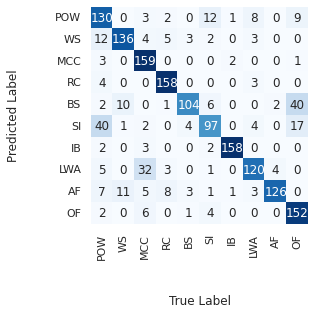

In [ ]:
#Confusion_Matrix
mat = confusion_matrix(predic, real)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label');
axes = plt.gca()
#axes.xaxis.label.set_size(17)
#axes.yaxis.label.set_size(17)
axes.xaxis.labelpad = 35
axes.yaxis.labelpad = 35

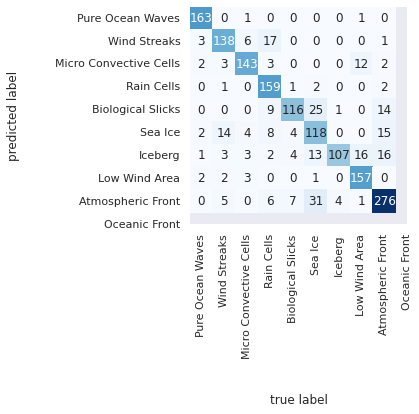

In [ ]:

mat = confusion_matrix(predic, real)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
axes = plt.gca()
#axes.xaxis.label.set_size(17)
#axes.yaxis.label.set_size(17)
axes.xaxis.labelpad = 35
axes.yaxis.labelpad = 35

In [ ]:
#Report
print( classification_report(real, predic))

              precision    recall  f1-score   support

          AF       0.63      0.79      0.70       165
          BS       0.86      0.82      0.84       165
          IB       0.74      0.96      0.84       165
         LWA       0.89      0.96      0.92       165
         MCC       0.90      0.63      0.74       165
          OF       0.78      0.59      0.67       165
         POW       0.98      0.96      0.97       165
          RC       0.85      0.73      0.78       165
          SI       0.95      0.76      0.85       165
          WS       0.69      0.92      0.79       165

    accuracy                           0.81      1650
   macro avg       0.83      0.81      0.81      1650
weighted avg       0.83      0.81      0.81      1650



##**Save Model**

In [ ]:
NSCNNMGeophysical.save_weights('NSCNNMGeophysical_weight3.h5')
NSCNNMGeophysical.save('NSCNNMGeophysical3.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:
from keras.models import load_model
m_CNNfoot = load_model("/content/NSCNNMGeophysical3.h5")

In [ ]:
class_names

['POW', 'WS', 'MCC', 'RC', 'BS', 'SI', 'IB', 'LWA', 'AF', 'OF']

In [ ]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

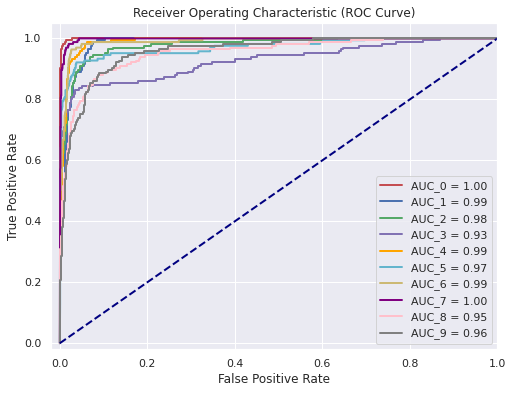

In [ ]:
# Binarize the output
y = label_binarize(Label_test , classes=[0, 1,2,3,4,5,6,7,8,9])
n_classes = y.shape[1]
y_score = NSCNNMGeophysical.predict(Data_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=(8,6))
lw = 2
colors = cycle(["r","b","g","m","orange","c","y","purple","pink","gray"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='AUC_{0} = {1:0.2f}'
             ''.format(i, roc_auc[i]))

#Gráfica ROC
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()